In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
#from pyfm import pylibfm
import seaborn as sns

# 读文件

In [6]:
df_train = pd.read_csv("C:/Users/DaSam/Desktop/Web  Economics/data/train.csv")
#df_validation = pd.read_csv('/Users/liuce/Downloads/we_data/validation.csv')
#df_test = pd.read_csv('/Users/liuce/Downloads/we_data/test.csv')

In [9]:
df_train.describe()

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.381152e+06,0.0,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,2.109685e+00,NaN,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,8.764370e-01,NaN,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,1.000000e+00,NaN,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,2.000000e+00,NaN,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,3.000000e+00,NaN,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,4.000000e+00,NaN,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [124]:
df_train.count()

click             2430981
weekday           2430981
hour              2430981
bidid             2430981
userid            2430981
useragent         2430981
IP                2430981
region            2430981
city              2430981
adexchange        2381152
domain            2293846
url               2344169
urlid                   0
slotid            2430981
slotwidth         2430981
slotheight        2430981
slotvisibility    2430981
slotformat        2430981
slotprice         2430981
creative          2430981
bidprice          2430981
payprice          2430981
keypage           1925991
advertiser        2430981
usertag           1933502
slotsize          2430981
dtype: int64

In [10]:
# 每条数据的bidid还真的不一样呢
len(set(df_train['bidid']))

2430981

In [11]:
# 一共有9个advertiser
set(df_train['advertiser'])

{1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476}

In [12]:
set(df_validation['advertiser']) # test and validation set也是同样的9个advertiser

NameError: name 'df_validation' is not defined

In [83]:
df_train_withTags = pd.read_csv('C:/Users/DaSam/Desktop/Web  Economics/data/train_withTags_Agent.csv')

In [139]:
df_train_withTags.columns

Index(['Unnamed: 0', 'click', 'weekday', 'hour', 'region', 'city',
       'adexchange', 'slotwidth', 'slotheight', 'slotprice', 'bidprice',
       'payprice', 'advertiser', '10006', '10024', '10031', '10048', '10052',
       '10057', '10059', '10063', '10067', '10074', '10075', '10076', '10077',
       '10079', '10083', '10093', '10102', '10110', '10111', '10114', '10115',
       '10116', '10117', '10118', '10120', '10123', '10125', '10126', '10127',
       '10129', '10130', '10131', '10133', '10138', '10140', '10142', '10145',
       '10146', '10147', '10148', '10149', '10684', '11092', '11278', '11379',
       '11423', '11512', '11576', '11632', '11680', '11724', '11944', '13042',
       '13403', '13496', '13678', '13776', '13800', '13866', '13874', '14273',
       '15398', '16593', '16617', '16661', '16706', '16751', '16753',
       'android', 'chrome', 'firefox', 'ie', 'ios', 'linux', 'mac', 'maxthon',
       'opera', 'other', 'safari', 'sogou', 'theworld', 'windows'],
      dtype=

# DF_Summary用来总结不同的Advertiser的数据

In [13]:
df_1458 = df_train[df_train['advertiser'] == 1458]
df_2259 = df_train[df_train['advertiser'] == 2259]
df_2261 = df_train[df_train['advertiser'] == 2261]
df_2821 = df_train[df_train['advertiser'] == 2821]
df_2997 = df_train[df_train['advertiser'] == 2997]
df_3358 = df_train[df_train['advertiser'] == 3358]
df_3386 = df_train[df_train['advertiser'] == 3386]
df_3427 = df_train[df_train['advertiser'] == 3427]
df_3476 = df_train[df_train['advertiser'] == 3476]

In [7]:
df_1458.describe()

,click,weekday,hour,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,492353.000000,492353.000000,492353.000000,492353.000000,492353.000000,492353.000000,492353.000000,492353.000000,492353.0,492353.000000,492353.0
mean,0.000782,2.995215,14.071445,144.312473,149.355330,596.508249,204.694863,28.275305,300.0,68.992646,1458.0
std,0.027953,2.025013,6.191677,102.339627,103.588528,315.488178,161.642903,37.933767,0.0,53.508160,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000,60.000000,0.000000,300.0,2.000000,1458.0
25%,0.000000,1.000000,10.000000,65.000000,76.000000,336.000000,90.000000,0.000000,300.0,32.000000,1458.0
50%,0.000000,3.000000,15.000000,146.000000,146.000000,728.000000,90.000000,5.000000,300.0,60.000000,1458.0
75%,0.000000,5.000000,19.000000,216.000000,220.000000,1000.000000,280.000000,59.000000,300.0,80.000000,1458.0
max,1.000000,6.000000,23.000000,395.000000,399.000000,1000.000000,600.000000,300.000000,300.0,300.000000,1458.0


In [14]:
df_train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [15]:
advertisers = list(set(df_train['advertiser']))
df_summary = pd.DataFrame(advertisers)
df_summary.columns = ['advertisers']

In [16]:
num_bids = []
for i in range(0, 9):
    num_bids.append(len(df_train[df_train['advertiser'] == df_summary.advertisers[i]]))
    
num_bids

[402806, 211366, 492353, 133673, 310835, 110122, 49829, 455041, 264956]

In [17]:
# 疑问：到底要不要算>=的情况？
imps = []
for i in range(0, 9):
    sub_df = df_train[df_train['advertiser'] == df_summary.advertisers[i]]
    imp = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    imps.append(imp)
    
imps

[402493, 211267, 491564, 133615, 310667, 110065, 49818, 454390, 264349]

In [18]:
clicks = []
for i in range(0, 9):
    sub_df = df_train[df_train['advertiser'] == df_summary.advertisers[i]]
    click = sub_df.click.sum()
    clicks.append(click)
    
clicks

[272, 131, 385, 43, 187, 36, 217, 320, 202]

In [19]:
costs = []
for i in range(0, 9):
    sub_df = df_train[df_train['advertiser'] == df_summary.advertisers[i]]
    win_df = sub_df[sub_df['bidprice'] > sub_df['payprice']]
    cost = win_df.payprice.sum()
    costs.append(cost)
    
costs

[30386516,
 18799210,
 33732036,
 12411390,
 23878311,
 9857123,
 3126220,
 34736523,
 22308705]

In [20]:
df_summary['num_bids'] = num_bids
df_summary['imps'] = imps
df_summary['clicks'] = clicks
df_summary['CTR'] = df_summary['clicks']/df_summary['imps']
df_summary['win_ratio'] = df_summary['imps']/df_summary['num_bids']
df_summary['cost'] = costs
df_summary['CPM'] = df_summary['cost']* 1000/df_summary['imps'] 
df_summary['eCPC'] = df_summary['cost']/df_summary['clicks']

In [125]:
df_summary.sort_values(by='advertisers')

,advertisers,num_bids,imps,clicks,CTR,win_ratio,cost,CPM,eCPC
2,1458,492353,491564,385,0.000783,0.998397,33732036,68621.860022,87615.677922
3,2259,133673,133615,43,0.000322,0.999566,12411390,92889.196572,288636.976744
5,2261,110122,110065,36,0.000327,0.999482,9857123,89557.288875,273808.972222
1,2821,211366,211267,131,0.000620,0.999532,18799210,88983.182418,143505.419847
6,2997,49829,49818,217,0.004356,0.999779,3126220,62752.820266,14406.543779
8,3358,264956,264349,202,0.000764,0.997709,22308705,84391.107967,110439.133663
7,3386,455041,454390,320,0.000704,0.998569,34736523,76446.495301,108551.634375
0,3427,402806,402493,272,0.000676,0.999223,30386516,75495.762659,111715.132353
4,3476,310835,310667,187,0.000602,0.999460,23878311,76861.433625,127691.502674


# 画图CTR

In [7]:
import matplotlib.pyplot as plt

In [ ]:
# CTR - Weekdays

In [22]:
weekdays = set(df_1458['weekday'])
weekdays

{0, 1, 2, 3, 4, 5, 6}

In [128]:
df_temp = df_1458
ctr_1 = []

for i in range(0, len(weekdays)):
    sub_df = df_temp[df_temp['weekday'] == i]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    ctr_1.append(clicks/imps)

ctr_1

[0.00068194038267346856,
 0.00095269779820953305,
 0.00070724483932281307,
 0.00075613267220194554,
 0.00088799770839301055,
 0.00086647846381753641,
 0.00064634883165423152]

In [129]:
df_temp = df_3386
ctr_2 = []

for i in range(0, len(weekdays)):
    sub_df = df_temp[df_temp['weekday'] == i]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    ctr_2.append(clicks/imps)
    
ctr_2

[0.0007489366512640072,
 0.00072047289220743065,
 0.00074523919006770579,
 0.00068442923490589103,
 0.00072957198443579768,
 0.00083088329285440363,
 0.0004874971323698096]

In [130]:
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
#m.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
m['Weekdays'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
m

,1458,3386,Weekdays
0,0.000682,0.000749,Mon
1,0.000953,0.000720,Tue
2,0.000707,0.000745,Wed
3,0.000756,0.000684,Thu
4,0.000888,0.000730,Fri
5,0.000866,0.000831,Sat
6,0.000646,0.000487,Sun


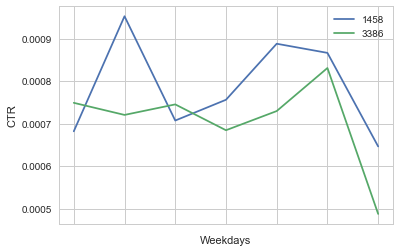

In [39]:
#m.plot()
#plt.xlabel("Weekdays")  
#plt.ylabel("CTR")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


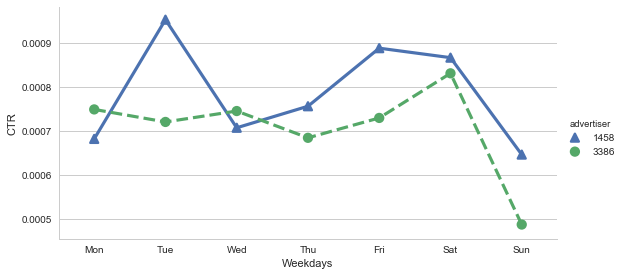

In [131]:
m1 = m.melt('Weekdays', var_name='advertiser',  value_name='CTR')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Weekdays', y='CTR', data=m1, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/weekdays-ctr.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# CTR - Hours

In [68]:
hours = set(df_1458['hour'])

In [132]:
df_temp = df_1458
ctr_1 = []

for i in range(0, len(hours)):
    sub_df = df_temp[df_temp['hour'] == i]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    ctr_1.append(clicks/imps)

df_temp = df_3386
ctr_2 = []

for i in range(0, len(hours)):
    sub_df = df_temp[df_temp['hour'] == i]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    ctr_2.append(clicks/imps)
    
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
#m.index = range(1,25)
m['Hours'] = range(0,24)

#m.plot()
#plt.xlabel("Hours")  
#plt.ylabel("CTR")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


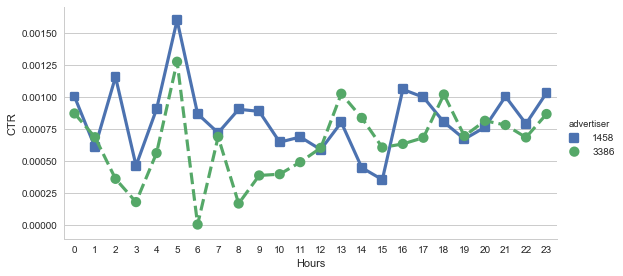

In [133]:
m1 = m.melt('Hours', var_name='advertiser',  value_name='CTR')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Hours', y='CTR', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/hours-ctr.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# CTR - OS

In [79]:
os = ['android', 'ios', 'linux', 'mac', 'windows']

In [134]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
ctr_1 = []

for i in range(0, len(os)):
    sub_df = df_temp[df_temp[os[i]] == 1]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_1.append(clicks/imps)
    else:
        ctr_1.append(0)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
ctr_2 = []

for i in range(0, len(os)):
    sub_df = df_temp[df_temp[os[i]] == 1]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_2.append(clicks/imps)
    else:
        ctr_2.append(0)
    
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
#m.index = ['android', 'ios', 'linux', 'mac', 'windows']
m['OS'] = ['android', 'ios', 'linux', 'mac', 'windows']

#m.plot()
#plt.xlabel("OS")  
#plt.ylabel("CTR")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


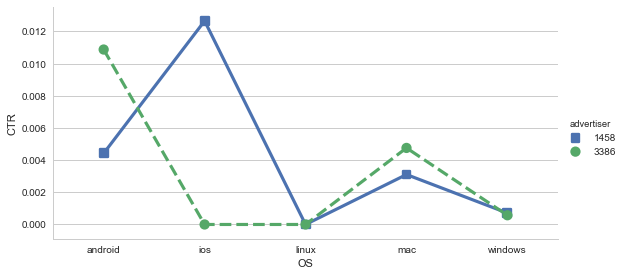

In [135]:
m1 = m.melt('OS', var_name='advertiser',  value_name='CTR')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='OS', y='CTR', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/os-ctr.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# CTR - Browser

In [90]:
browsers = ['chrome', 'firefox', 'ie', 'maxthon',
       'opera', 'other', 'safari', 'sogou', 'theworld']

In [95]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
ctr_1 = []

for i in range(0, len(browsers)):
    sub_df = df_temp[df_temp[browsers[i]] == 1]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_1.append(clicks/imps)
    else:
        ctr_1.append(0)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
ctr_2 = []

for i in range(0, len(browsers)):
    sub_df = df_temp[df_temp[browsers[i]] == 1]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_2.append(clicks/imps)
    else:
        ctr_2.append(0)
    
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
#m.index = browsers
m['Browsers'] = browsers


#m.plot()
#plt.xlabel("Browsers")  
#plt.ylabel("CTR")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


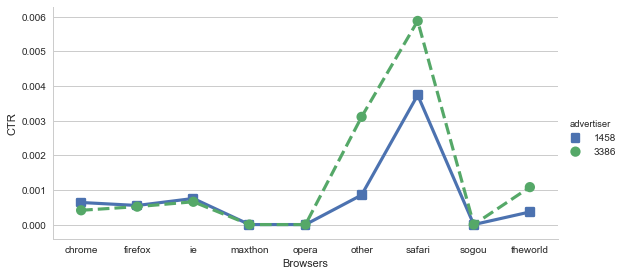

In [94]:
m1 = m.melt('Browsers', var_name='advertiser',  value_name='CTR')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Browsers', y='CTR', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/hours-ctr.png',format = 'png', dpi = 15)
plt.show()

In [ ]:
# CTR - Region

In [96]:
regions = list(set(df_1458['region']))

In [97]:
regions.sort()

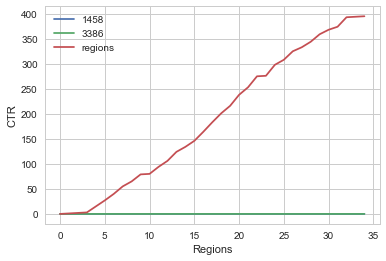

In [146]:
df_temp = df_1458
ctr_1 = []

for i in range(0, len(regions)):
    sub_df = df_temp[df_temp['region'] == regions[i]]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    ctr_1.append(clicks/imps)

df_temp = df_3386
ctr_2 = []

for i in range(0, len(regions)):
    sub_df = df_temp[df_temp['region'] == regions[i]]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    ctr_2.append(clicks/imps)
    
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
#m.index = regions
m['regions'] = regions

m.plot()
plt.xlabel("Regions")  
plt.ylabel("CTR")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


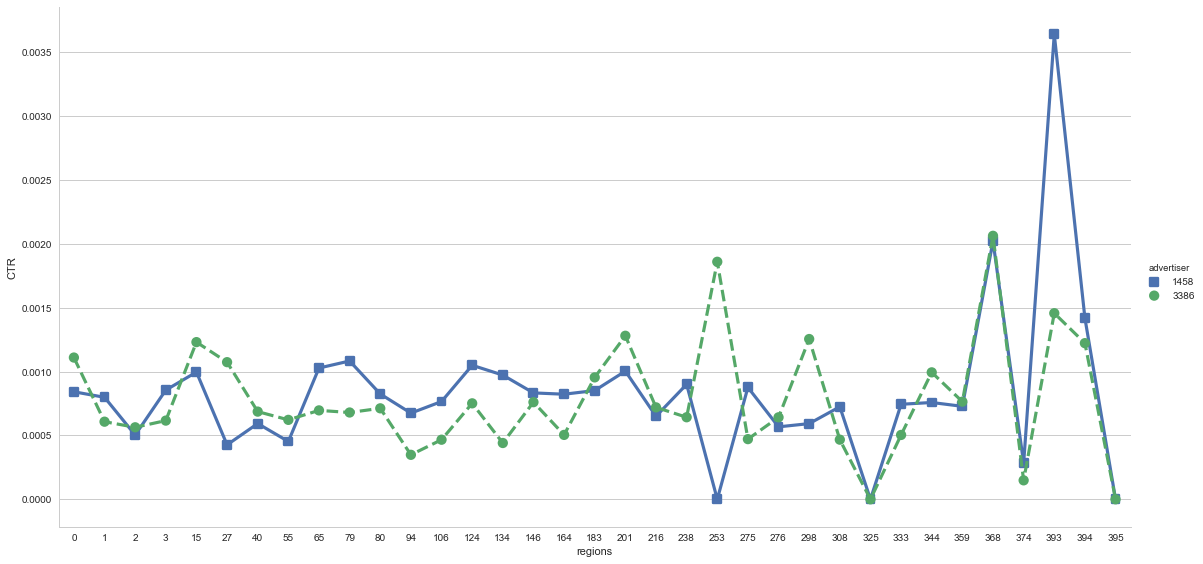

In [147]:
m1 = m.melt('regions', var_name='advertiser',  value_name='CTR')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='regions', y='CTR', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=8, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/Regions-ctr.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# CTR - Slot Price

In [102]:
df_train['slotsize'] = df_train['slotwidth'] * df_train['slotheight']

In [103]:
slotsize = list(set(df_train['slotsize']))

In [104]:
maxsize = max(slotsize)
maxsize

180000

In [105]:
minsize = min(slotsize)
minsize

14040

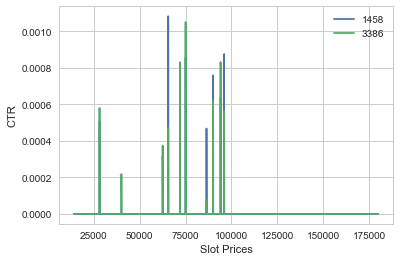

In [106]:
df_temp = df_train[df_train_withTags['advertiser'] == 1458]
ctr_1 = []

for i in range(minsize, maxsize):
    sub_df = df_temp[df_temp['slotsize'] == i]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_1.append(clicks/imps)
    else:
        ctr_1.append(0)

df_temp = df_train[df_train_withTags['advertiser'] == 3386]
ctr_2 = []

for i in range(minsize, maxsize):
    sub_df = df_temp[df_temp['slotsize'] == i]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_2.append(clicks/imps)
    else:
        ctr_2.append(0)
    
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
m.index = range(minsize, maxsize)

m.plot()
plt.xlabel("Slot Prices")  
plt.ylabel("CTR")
plt.show()

In [ ]:
# CTR - Ad Exchange

In [107]:
adexchange = list(set(df_train['adexchange']))
adexchange.sort()
adexchange

[nan,
 1.0,
 2.0,
 3.0,
 4.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

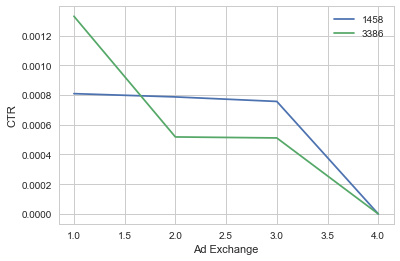

In [108]:
df_temp = df_1458
ctr_1 = []

for i in range(0, len(adexchange)):
    sub_df = df_temp[df_temp['adexchange'] == adexchange[i]]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_1.append(clicks/imps)
    else:
        ctr_1.append(0)

df_temp = df_3386
ctr_2 = []

for i in range(0, len(adexchange)):
    sub_df = df_temp[df_temp['adexchange'] == adexchange[i]]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_2.append(clicks/imps)
    else:
        ctr_2.append(0)
    
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
m.index = adexchange

m.plot()
plt.xlabel("Ad Exchange")  
plt.ylabel("CTR")
plt.show()

In [ ]:
# CTR - Tag

In [109]:
#tags = list(set(df_train['usertag']))
tags = ['10006', '10024', '10031', '10048', '10052',
       '10057', '10059', '10063', '10067', '10074', '10075', '10076', '10077',
       '10079', '10083', '10093', '10102', '10110', '10111', '10114', '10115',
       '10116', '10117', '10118', '10120', '10123', '10125', '10126', '10127',
       '10129', '10130', '10131', '10133', '10138', '10140', '10142', '10145',
       '10146', '10147', '10148', '10149', '10684', '11092', '11278', '11379',
       '11423', '11512', '11576', '11632', '11680', '11724', '11944', '13042',
       '13403', '13496', '13678', '13776', '13800', '13866', '13874', '14273',
       '15398', '16593', '16617', '16661', '16706', '16751', '16753']

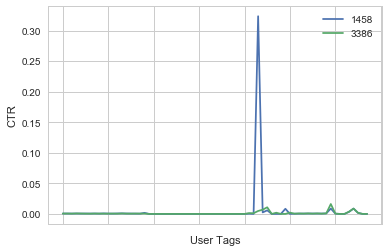

In [110]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
ctr_1 = []

for i in range(0, len(tags)):
    sub_df = df_temp[df_temp[tags[i]] == 1]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_1.append(clicks/imps)
    else:
        ctr_1.append(0)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
ctr_2 = []

for i in range(0, len(tags)):
    sub_df = df_temp[df_temp[tags[i]] == 1]
    imps = len(sub_df[sub_df['bidprice'] > sub_df['payprice']])
    clicks = sub_df.click.sum()
    if imps != 0:
        ctr_2.append(clicks/imps)
    else:
        ctr_2.append(0)
    
m = pd.DataFrame(ctr_1)
m['3386'] = ctr_2
m.columns = ['1458', '3386']
m.index = tags

m.plot()
plt.xlabel("User Tags")  
plt.ylabel("CTR")
plt.show()

# 画图 Pay Price

In [148]:
df_temp = df_1458
p_1 = []

for i in range(0, len(weekdays)):
    sub_df = df_temp[df_temp['weekday'] == i]
    p = sub_df.payprice.mean()
    p_1.append(p)

df_temp = df_3386
p_2 = []

for i in range(0, len(weekdays)):
    sub_df = df_temp[df_temp['weekday'] == i]
    p = sub_df.payprice.mean()
    p_2.append(p)

m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
#m.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
m['Weekdays'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

#m.plot()
#plt.xlabel("Weekdays")  
#plt.ylabel("Market Price")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


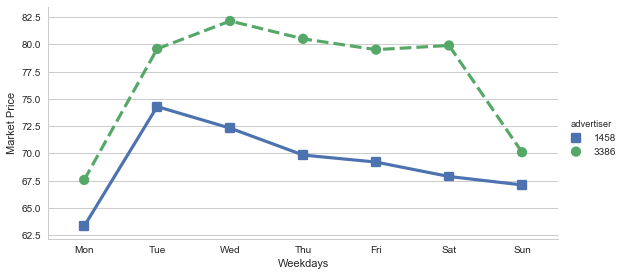

In [149]:
m1 = m.melt('Weekdays', var_name='advertiser',  value_name='Market Price')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Weekdays', y='Market Price', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/weekdays-payprice.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# Price - Hours

In [150]:
df_temp = df_1458
p_1 = []

for i in range(0, len(hours)):
    sub_df = df_temp[df_temp['hour'] == i]
    p = sub_df.payprice.mean()
    p_1.append(p)

df_temp = df_3386
p_2 = []

for i in range(0, len(hours)):
    sub_df = df_temp[df_temp['hour'] == i]
    p = sub_df.payprice.mean()
    p_2.append(p)

m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
#m.index = range(1,25)
m['Hours'] = range(0,24)

#m.plot()
#plt.xlabel("Hours")  
#plt.ylabel("Market Price")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


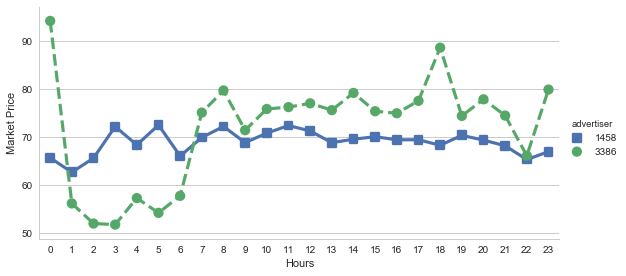

In [152]:
m1 = m.melt('Hours', var_name='advertiser',  value_name='Market Price')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Hours', y='Market Price', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/hours-payprice.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# Price - OS

In [158]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
p_1 = []

for i in range(0, len(os)):
    sub_df = df_temp[df_temp[os[i]] == 1]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_1.append(p)
    else:
        p_1.append(0)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
p_2 = []

for i in range(0, len(os)):
    sub_df = df_temp[df_temp[os[i]] == 1]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_2.append(p)
    else:
        p_2.append(0)
    
m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
#m.index = ['android', 'ios', 'linux', 'mac', 'windows']
m['OS'] = ['android', 'ios', 'linux', 'mac', 'windows']

#m.plot()
#plt.xlabel("OS")  
#plt.ylabel("Market Price")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


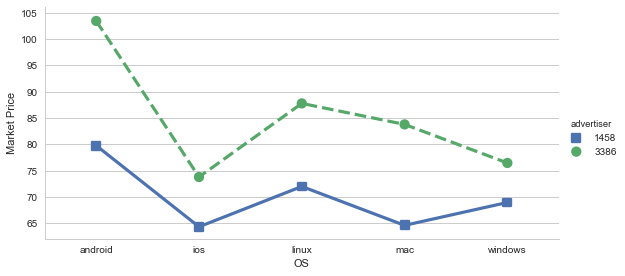

In [159]:
m1 = m.melt('OS', var_name='advertiser',  value_name='Market Price')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='OS', y='Market Price', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/OS-payprice.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# Price - Browser

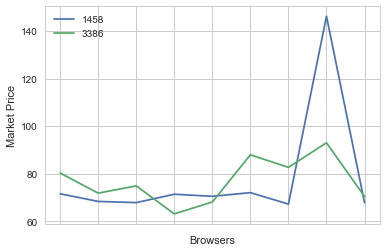

In [114]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
p_1 = []

for i in range(0, len(browsers)):
    sub_df = df_temp[df_temp[browsers[i]] == 1]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_1.append(p)
    else:
        p_1.append(0)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
p_2 = []

for i in range(0, len(browsers)):
    sub_df = df_temp[df_temp[browsers[i]] == 1]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_2.append(p)
    else:
        p_2.append(0)
    
m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
m.index = browsers

m.plot()
plt.xlabel("Browsers")  
plt.ylabel("Market Price")
plt.show()

In [ ]:
# Price - Region

In [155]:
df_temp = df_1458
p_1 = []

for i in range(0, len(regions)):
    sub_df = df_temp[df_temp['region'] == regions[i]]
    p = sub_df.payprice.mean()
    p_1.append(p)

df_temp = df_3386
p_2 = []

for i in range(0, len(regions)):
    sub_df = df_temp[df_temp['region'] == regions[i]]
    p = sub_df.payprice.mean()
    p_2.append(p)

m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
#m.index = regions
m['Regions'] = regions
#m.plot()
#plt.xlabel("Regions")  
#plt.ylabel("Market Price")
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


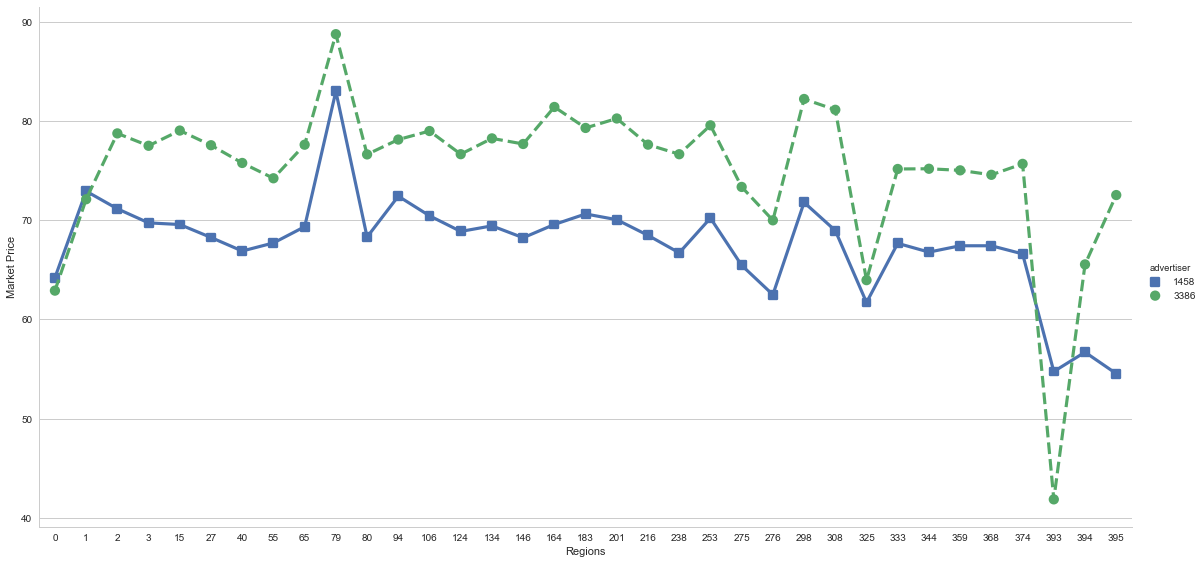

In [157]:
m1 = m.melt('Regions', var_name='advertiser',  value_name='Market Price')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Regions', y='Market Price', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=8, aspect=2)
#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/regions-payprice.png',format = 'png', dpi = 150)
plt.show()

In [ ]:
# Price - Slot size

/Users/liuce/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


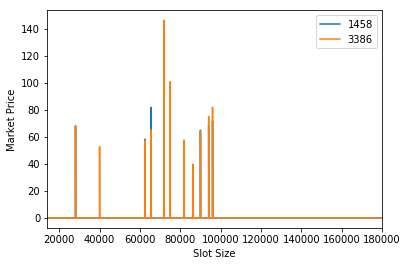

In [209]:
df_temp = df_train[df_train_withTags['advertiser'] == 1458]
p_1 = []

for i in range(minsize, maxsize):
    sub_df = df_temp[df_temp['slotsize'] == i]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_1.append(p)
    else:
        p_1.append(0)

df_temp = df_train[df_train_withTags['advertiser'] == 3386]
p_2 = []

for i in range(minsize, maxsize):
    sub_df = df_temp[df_temp['slotsize'] == i]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_2.append(p)
    else:
        p_2.append(0)
    
m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
m.index = range(minsize, maxsize)

m.plot()
plt.xlabel("Slot Size")  
plt.ylabel("Market Price")
plt.show()

In [ ]:
# Price - Ad Exchange

In [180]:
adexchange

['1', '2', '3', '4', 'null']

In [196]:
df_1458[df_1458['adexchange'] == 'null'].payprice.mean()

nan

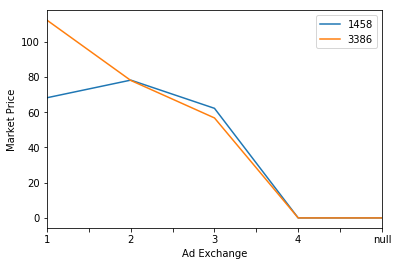

In [197]:
df_temp = df_1458
p_1 = []

for i in range(0, len(adexchange)):
    sub_df = df_temp[df_temp['adexchange'] == adexchange[i]]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_1.append(p)
    else:
        p_1.append(0)

df_temp = df_3386
p_2 = []

for i in range(0, len(adexchange)):
    sub_df = df_temp[df_temp['adexchange'] == adexchange[i]]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_2.append(p)
    else:
        p_2.append(0)

m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
m.index = adexchange

m.plot()
plt.xlabel("Ad Exchange")  
plt.ylabel("Market Price")
plt.show()

In [ ]:
# Price - Tags

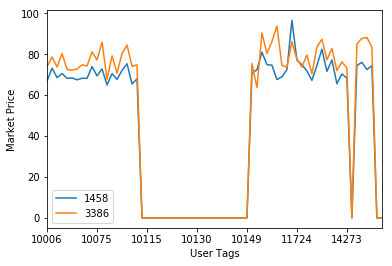

In [199]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
p_1 = []

for i in range(0, len(tags)):
    sub_df = df_temp[df_temp[tags[i]] == 1]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_1.append(p)
    else:
        p_1.append(0)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
p_2 = []

for i in range(0, len(tags)):
    sub_df = df_temp[df_temp[tags[i]] == 1]
    p = sub_df.payprice.mean()
    if len(sub_df) != 0:
        p_2.append(p)
    else:
        p_2.append(0)
    
m = pd.DataFrame(p_1)
m['3386'] = p_2
m.columns = ['1458', '3386']
m.index = tags

m.plot()
plt.xlabel("User Tags")  
plt.ylabel("Market Price")
plt.show()

In [205]:
m.index[m['3386'] == 0] # 1458 and 3386 没有的tags, 检验过了，是一样的

Index(['10114', '10115', '10116', '10117', '10118', '10120', '10123', '10125',
       '10126', '10127', '10129', '10130', '10131', '10133', '10138', '10140',
       '10142', '10145', '10146', '10147', '10148', '10149', '15398', '16751',
       '16753'],
      dtype='object')

# 画图 eCPC

In [160]:
df_temp = df_1458
e_1 = []

for i in range(0, len(weekdays)):
    sub_df = df_temp[df_temp['weekday'] == i]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    e_1.append(cost/clicks)

df_temp = df_3386
e_2 = []

for i in range(0, len(weekdays)):
    sub_df = df_temp[df_temp['weekday'] == i]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    e_2.append(cost/clicks)

m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
#m.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
m['Weekdays'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
m
#m.plot()
#plt.xlabel("Weekdays")  
#plt.ylabel("eCPC")
#plt.show()

,1458,3386,Weekdays
0,92996.961538,90325.867925,Mon
1,78111.857143,110618.113636,Tue
2,102417.270833,110382.829787,Wed
3,92503.365385,117819.880952,Thu
4,77989.725806,109087.333333,Fri
5,78418.467742,96286.980769,Sat
6,104094.239130,144053.294118,Sun


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


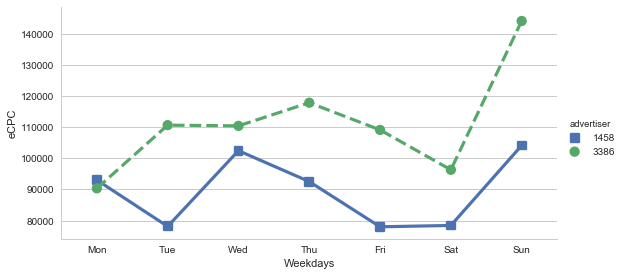

In [169]:
m1 = m.melt('Weekdays', var_name='advertiser',  value_name='eCPC')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Weekdays', y='eCPC', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)

#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/Weekdays-eCPC.png',format = 'png', dpi = 150)
plt.show()

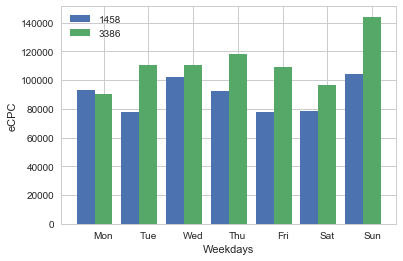

In [117]:
x =list(range(len(m.index)))  
total_width, n = 0.8, 2  
width = total_width / n  

plt.bar(x, e_1, width=width, label='1458')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, e_2, width=width, label='3386', tick_label = m.index)

plt.xlabel("Weekdays")  
plt.ylabel("eCPC")
plt.legend() 
plt.show()

In [171]:
df_temp = df_1458
e_1 = []

for i in range(0, len(hours)):
    sub_df = df_temp[df_temp['hour'] == i]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_1.append(np.nan)
    else:
        e_1.append(cost/clicks)

df_temp = df_3386
e_2 = []

for i in range(0, len(hours)):
    sub_df = df_temp[df_temp['hour'] == i]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_2.append(np.nan)
    else:
        e_2.append(cost/clicks)

m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
#m.index = range(1,25)
m['Hours'] = range(0,24)


#m.plot()
#plt.xlabel("Hours")  
#plt.ylabel("eCPC")
#plt.show()

#x =list(range(len(m.index)))  
#total_width, n = 0.8, 2  
#width = total_width / n  

#plt.bar(x, e_1, width=width, label='1458')
#for i in range(len(x)):  
#    x[i] = x[i] + width  
#plt.bar(x, e_2, width=width, label='3386', tick_label = m.index)

#plt.xlabel("Hours")  
#plt.ylabel("eCPC")
#plt.legend() 
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


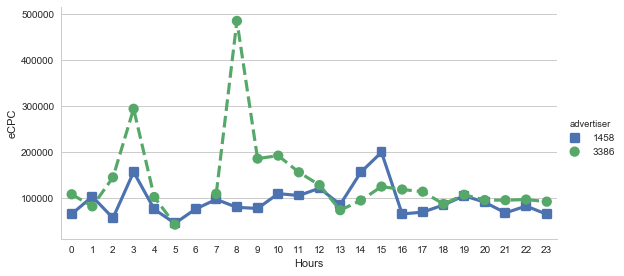

In [172]:
m1 = m.melt('Hours', var_name='advertiser',  value_name='eCPC')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Hours', y='eCPC', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)

#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/Hours-eCPC.png',format = 'png', dpi = 150)
plt.show()

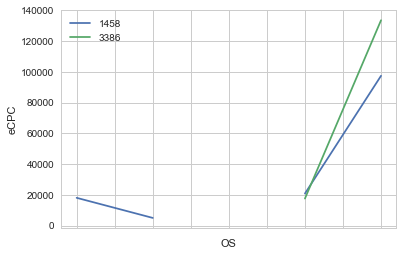

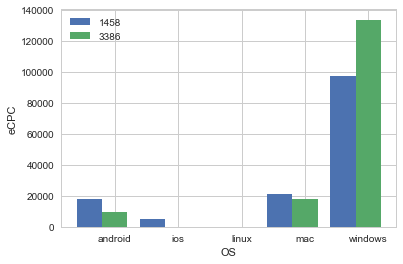

In [176]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
e_1 = []

for i in range(0, len(os)):
    sub_df = df_temp[df_temp[os[i]] == 1]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_1.append(np.nan)
    else:
        e_1.append(cost/clicks)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
e_2 = []

for i in range(0, len(os)):
    sub_df = df_temp[df_temp[os[i]] == 1]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_2.append(np.nan)
    else:
        e_2.append(cost/clicks)

m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
m.index = os
#m['OS'] = os

m.plot()
plt.xlabel("OS")  
plt.ylabel("eCPC")
plt.show()

x =list(range(len(m.index)))  
total_width, n = 0.8, 2  
width = total_width / n  

plt.bar(x, e_1, width=width, label='1458')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, e_2, width=width, label='3386', tick_label = m.index)

plt.xlabel("OS")  
plt.ylabel("eCPC")
plt.legend() 
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


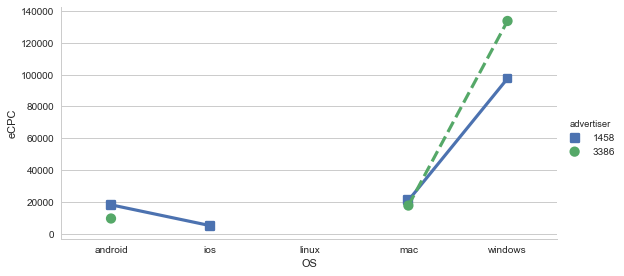

In [175]:
m1 = m.melt('OS', var_name='advertiser',  value_name='eCPC')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='OS', y='eCPC', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=4, aspect=2)

#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/OS-eCPC.png',format = 'png', dpi = 150)
plt.show()

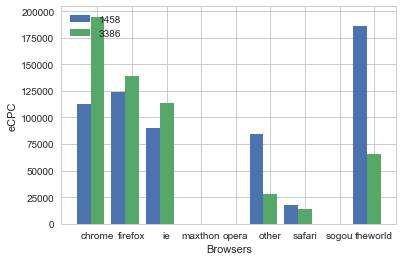

In [120]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
e_1 = []

for i in range(0, len(browsers)):
    sub_df = df_temp[df_temp[browsers[i]] == 1]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_1.append(np.nan)
    else:
        e_1.append(cost/clicks)

df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
e_2 = []

for i in range(0, len(browsers)):
    sub_df = df_temp[df_temp[browsers[i]] == 1]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_2.append(np.nan)
    else:
        e_2.append(cost/clicks)

m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
m.index = browsers

#m.plot()
#plt.xlabel("Browsers")  
#plt.ylabel("eCPC")
#plt.show()

x =list(range(len(m.index)))  
total_width, n = 0.8, 2  
width = total_width / n  

plt.bar(x, e_1, width=width, label='1458')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, e_2, width=width, label='3386', tick_label = m.index)

plt.xlabel("Browsers")  
plt.ylabel("eCPC")
plt.legend() 
plt.show()

In [177]:
df_temp = df_1458
e_1 = []

for i in range(0, len(regions)):
    sub_df = df_temp[df_temp['region'] == regions[i]]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_1.append(np.nan)
    else:
        e_1.append(cost/clicks)

df_temp = df_3386
e_2 = []

for i in range(0, len(regions)):
    sub_df = df_temp[df_temp['region'] == regions[i]]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_2.append(np.nan)
    else:
        e_2.append(cost/clicks)

m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
#m.index = regions
m['Regions'] = regions

#m.plot()
#plt.xlabel("Regions")  
#plt.ylabel("eCPC")
#plt.show()

#x =list(range(len(m.index)))  
#total_width, n = 0.8, 2  
#width = total_width / n  

#plt.bar(x, e_1, width=width, label='1458')
#for i in range(len(x)):  
#    x[i] = x[i] + width  
#plt.bar(x, e_2, width=width, label='3386', tick_label = m.index)

#plt.xlabel("Regions")  
#plt.ylabel("eCPC")
#plt.legend() 
#plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


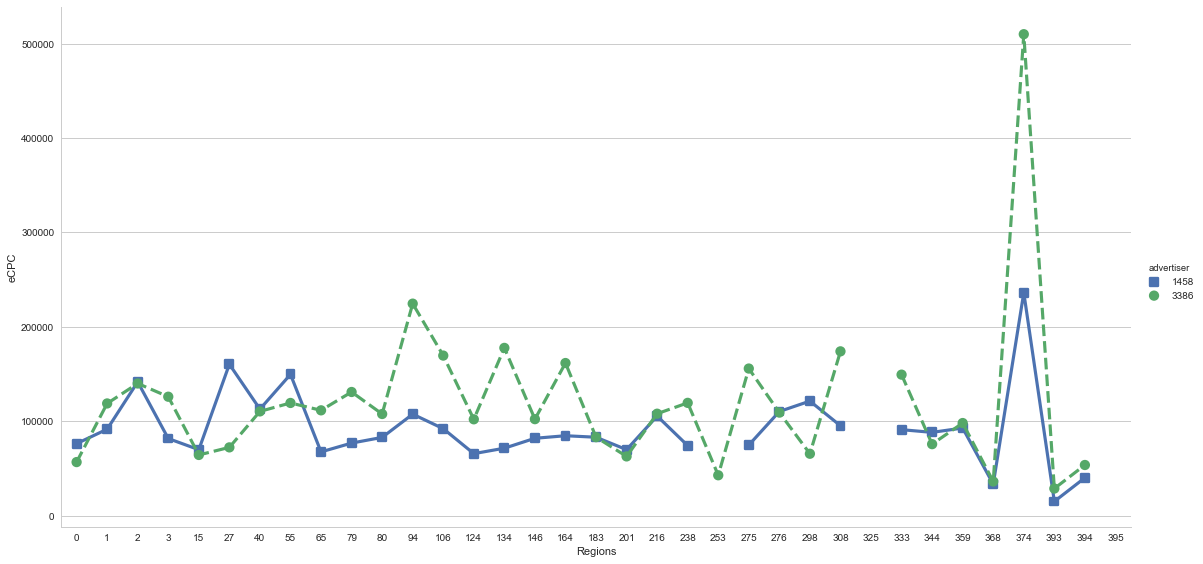

In [178]:
m1 = m.melt('Regions', var_name='advertiser',  value_name='eCPC')

sns.set(style="whitegrid")
ax1 = sns.factorplot(x='Regions', y='eCPC', data=m1, hue='advertiser',
              markers=["s", "o"], linestyles=["-", "--"], size=8, aspect=2)

#fig = ax2.get_figure()
#ax1.savefig('day-ctr.eps', format='eps', dpi=15)
ax1.savefig('C:/Users/DaSam/Desktop/Web  Economics/pics/Regions-eCPC.png',format = 'png', dpi = 150)
plt.show()

In [222]:
df_temp = df_train[df_train_withTags['advertiser'] == 1458]
e_1 = []

for i in range(minsize, maxsize):
    sub_df = df_temp[df_temp['slotsize'] == i]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_1.append(np.nan)
    else:
        e_1.append(cost/clicks)

df_temp = df_train[df_train_withTags['advertiser'] == 3386]
e_2 = []

for i in range(minsize, maxsize):
    sub_df = df_temp[df_temp['slotsize'] == i]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_2.append(np.nan)
    else:
        e_2.append(cost/clicks)

m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
m.index = range(minsize, maxsize)

m.plot()
plt.xlabel("Slot Size")  
plt.ylabel("eCPC")
plt.show()

KeyboardInterrupt: 

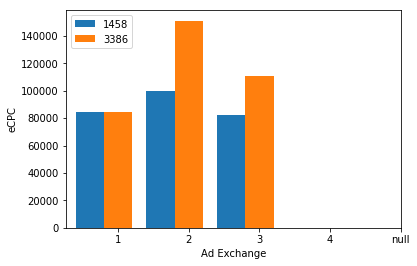

In [236]:
df_temp = df_1458
e_1 = []

for i in range(0, len(adexchange)):
    sub_df = df_temp[df_temp['adexchange'] == adexchange[i]]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_1.append(np.nan)
    else:
        e_1.append(cost/clicks)
        
df_temp = df_3386
e_2 = []

for i in range(0, len(adexchange)):
    sub_df = df_temp[df_temp['adexchange'] == adexchange[i]]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_2.append(np.nan)
    else:
        e_2.append(cost/clicks)
        
m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
m.index = adexchange

#m.plot()
#plt.xlabel("Ad Exchange")  
#plt.ylabel("eCPC")
#plt.show()

x =list(range(len(m.index)))  
total_width, n = 0.8, 2  
width = total_width / n  

plt.bar(x, e_1, width=width, label='1458')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, e_2, width=width, label='3386', tick_label = m.index)

plt.xlabel("Ad Exchange")  
plt.ylabel("eCPC")
plt.legend() 
plt.show()

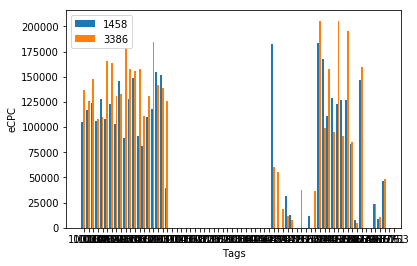

In [237]:
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 1458]
e_1 = []

for i in range(0, len(tags)):
    sub_df = df_temp[df_temp[tags[i]] == 1]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_1.append(np.nan)
    else:
        e_1.append(cost/clicks)
        
df_temp = df_train_withTags[df_train_withTags['advertiser'] == 3386]
e_2 = []

for i in range(0, len(tags)):
    sub_df = df_temp[df_temp[tags[i]] == 1]
    clicks = sub_df.click.sum()
    cost = sub_df.payprice.sum()
    if clicks == 0:
        e_2.append(np.nan)
    else:
        e_2.append(cost/clicks)
        
m = pd.DataFrame(e_1)
m['3386'] = e_2
m.columns = ['1458', '3386']
m.index = tags

#m.plot()
#plt.xlabel("User Tages")  
#plt.ylabel("eCPC")
#plt.show()

x =list(range(len(m.index)))  
total_width, n = 0.8, 2  
width = total_width / n  

plt.bar(x, e_1, width=width, label='1458')
for i in range(len(x)):  
    x[i] = x[i] + width  
plt.bar(x, e_2, width=width, label='3386', tick_label = m.index)

plt.xlabel("Tags")  
plt.ylabel("eCPC")
plt.legend() 
plt.show()

# 草稿

/Users/liuce/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


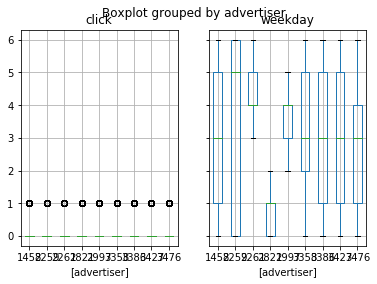

In [23]:
import matplotlib.pyplot as plt
df_train[['click', 'weekday','advertiser']].boxplot(by='advertiser')
plt.show()

In [31]:
df_2 = pd.concat([df_1458, df_3476])

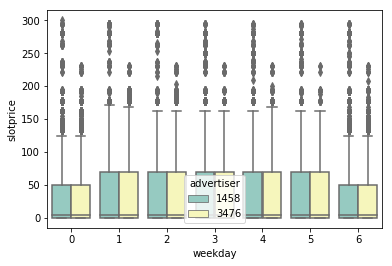

In [33]:
import seaborn as sns
ax = sns.boxplot(x="weekday", y="slotprice", hue="advertiser",
                    data=df_2, palette="Set3")

In [10]:
np.random.seed(2)  #设置随机种子
df = pd.DataFrame(np.random.rand(5,4),columns=['A', 'B', 'C', 'D'])

,A,B,C,D
0,0.435995,0.025926,0.549662,0.435322
1,0.420368,0.330335,0.204649,0.619271
2,0.299655,0.266827,0.621134,0.529142
3,0.134580,0.513578,0.184440,0.785335
4,0.853975,0.494237,0.846561,0.079645


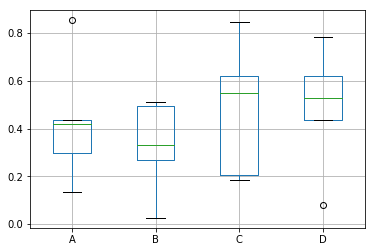

In [15]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()

In [18]:
df['E'] = np.random.choice(['X', 'Y'], size=5) #加入以X、Y随机分类的E列
print(df)


          A         B         C         D  E
0  0.435995  0.025926  0.549662  0.435322  X
1  0.420368  0.330335  0.204649  0.619271  X
2  0.299655  0.266827  0.621134  0.529142  Y
3  0.134580  0.513578  0.184440  0.785335  X
4  0.853975  0.494237  0.846561  0.079645  Y


/Users/liuce/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


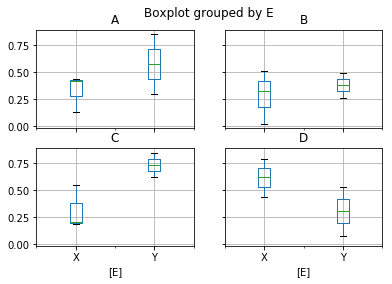

In [19]:
plt.figure()
df.boxplot(by='E')
plt.show()